<h1> Early-Stage Alzheimer's Disease Prediction Using Machine Learning Models </h1>

<h2> Prva kontrolna točka </h2>

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Učitavanje podataka:

In [117]:
X = pd.read_csv("oasis_longitudinal.csv")

Opis podataka:

In [118]:
X.shape

(373, 15)

Dakle 373 redaka i 15 stupaca.

In [119]:
X.head

<bound method NDFrame.head of     Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0    OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1    OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2    OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3    OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4    OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
..         ...            ...          ...    ...       ...  ..  ...  ...   
368  OAS2_0185  OAS2_0185_MR2     Demented      2       842   M    R   82   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   
370  OAS2_0186  OAS2_0186_MR1  Nondemented      1         0   F    R   61   
371  OAS2_0186  OAS2_0186_MR2  Nondemented      2       763   F    R   63   
372  OAS2_0186  OAS2_0186_MR3  Nondemented      3      1608   F    R   65   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF

Ovime je dobiven općenit pregled podataka, to jest, nekih redaka iz podataka, i uključuje sve atribute.
Dostupni atributi su:



In [120]:
X.columns.values

array(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F',
       'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype=object)

Značenje atributa:

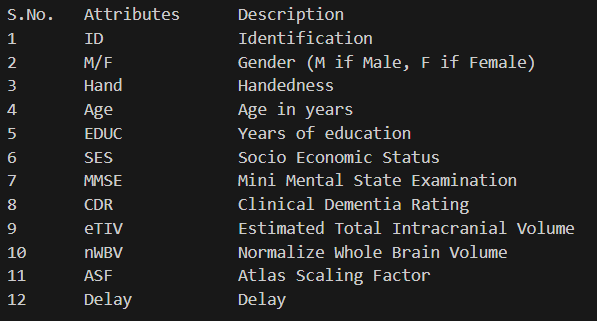

Tipovi atributa:

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Ovdje su neki glavni opisnici skupa podataka:

In [122]:
X.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Može se uočiti da nedostaju neki podaci, gdje je count manji od ukupnog broja podataka (373). Za SES ima 354 dostupnih podataka te MMSE ima 371. Provjera koliko podataka nedostaje:

In [123]:
X.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

Dakle nedostaje 19 podataka za atribut SES, i 2 podatka za atribut MMSE. Nedostajuće podatke za SES bi valjalo zamijeniti nekom vrijednošću (npr. medijan vrijednošću izračunatom nad dostupnim podacima), umjesto da se potpuno izbrišu zapisi s nedostajućom vrijednosti, jer 19 podataka naprema 373 ipak predstavlja neki značaj. 2 zapisa u kojima nedostaje podatak za atribut MMSE mogu se obrisati jer je gubitak relativno nezamjetan.

In [124]:
# ubaci medijan vrijednost za SES tamo gdje nedostaje ta informacija
X.loc[X.SES.isna(),'SES'] = X.loc[:,'SES'].median()

# izbaci zapise s nedostajućom vrijednosti značajke MMSE
X = X.loc[X.MMSE.notnull(), :]

In [125]:
X.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.878706,593.876011,77.018868,14.611860,2.439353,27.342318,0.287062,1489.876011,0.729526,1.193776
std,0.923480,636.636500,7.660864,2.877737,1.111835,3.683244,0.371912,174.990473,0.037229,0.136533
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.500000,0.700000,1.098500
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1471.000000,0.729000,1.193000
75%,2.000000,869.500000,82.000000,16.000000,3.000000,30.000000,0.500000,1598.000000,0.756000,1.292000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Dakle sada ima 371 zapis, sa dostupnim svim atributima.

Za detekciju stršećih vrijednosti može se napraviti sljedeće:

  Vizualizacija kutijastim grafom

In [126]:
X.boxplot()

<Axes: >

S grafa je očito da neki atributi imaju drastično različite skale od drugih, što može otežati usporedbu i kasnije rukovanje podacima. Ali i ovdje je očigledno da atribut MR Delay ima neke stršeće vrijednosti, što je ujedno vidljivo i u opisu skupa podataka, gdje je mean 593, stdev 636, a max 2639. Uistinu, može se vidjeti da postoji mnoštvo outliera za atribut MR Delay (uz prag 1.5):

In [127]:
columns_to_check = ['MR Delay']

Q1 = X[columns_to_check].quantile(0.25)
Q3 = X[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

outliers = ((X[columns_to_check] < (Q1 - threshold * IQR)) | (X[columns_to_check] > (Q3 + threshold * IQR)))

outliers_rows = X[outliers.any(axis=1)]
print(outliers_rows)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
32   OAS2_0017  OAS2_0017_MR5  Nondemented      5      2400   M    R   86   
71   OAS2_0036  OAS2_0036_MR5  Nondemented      5      2369   F    R   75   
75   OAS2_0037  OAS2_0037_MR4     Demented      4      2508   M    R   89   
153  OAS2_0070  OAS2_0070_MR5  Nondemented      5      2386   M    R   86   
159  OAS2_0073  OAS2_0073_MR4  Nondemented      4      2288   F    R   76   
160  OAS2_0073  OAS2_0073_MR5  Nondemented      5      2517   F    R   77   
265  OAS2_0127  OAS2_0127_MR5    Converted      5      2639   M    R   86   
369  OAS2_0185  OAS2_0185_MR3     Demented      3      2297   M    R   86   

     EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
32     12  3.0  27.0  0.0  1813  0.761  0.968  
71     13  4.0  29.0  0.0  1349  0.778  1.301  
75     12  4.0  26.0  0.5  1485  0.706  1.181  
153    17  1.0  30.0  0.0  1720  0.705  1.020  
159    14  3.0  29.0  0.0  1490  0.774  1.178  
160    14  3.0  29

Normalizacija podataka može pomoći s međusobnom razlikom u skali atributa, kao i sa stršećim vrijednostima:

In [128]:
from sklearn.preprocessing import StandardScaler

X_tmp = X.copy()
features_to_normalize = ['MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

# Z-score Standardization
standard_scaler = StandardScaler()
X_standardized = pd.DataFrame(standard_scaler.fit_transform(X[features_to_normalize]), columns=features_to_normalize)

X_norm = pd.concat([X_tmp.drop(columns=features_to_normalize), X_standardized], axis=1)

In [129]:
X_norm.dropna(inplace=True)

In [130]:
X_norm.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,1.875339,0.001755,0.002139,0.004926,0.002145,0.008609,-0.003107,-0.005199,0.004742,0.005377
std,0.924112,1.002774,1.003598,1.001818,1.003642,0.996726,1.003173,1.001560,1.001981,1.001385
min,1.000000,-0.934093,-2.224534,-2.996621,-1.296323,-6.345993,-0.772897,-2.196659,-2.300375,-2.330606
25%,1.000000,-0.934093,-0.786725,-0.908834,-0.395694,-0.093065,-0.772897,-0.754636,-0.794148,-0.658429
50%,2.000000,-0.065866,-0.002466,0.135059,-0.395694,0.450668,-0.772897,-0.113737,-0.014137,0.001641
75%,2.000000,0.439027,0.651083,0.483023,0.504935,0.722535,0.573322,0.572941,0.712080,0.727718
max,5.000000,3.216727,2.742441,2.918775,2.306192,0.722535,4.611980,2.941979,2.890730,2.883946


In [131]:
X_norm.head()

,Subject ID,MRI ID,Group,Visit,M/F,Hand,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,M,R,-0.934093,1.304632,-0.212906,-0.395694,-0.093065,-0.772897,2.844700,-0.901736,-2.279267
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,M,R,-0.215289,1.435342,-0.212906,-0.395694,0.722535,-0.772897,2.941979,-1.305189,-2.330606
2,OAS2_0002,OAS2_0002_MR1,Demented,1.0,M,R,-0.934093,-0.263886,-0.908834,-0.395694,-1.180531,0.573322,1.076505,0.174141,-1.083807
3,OAS2_0002,OAS2_0002_MR2,Demented,2.0,M,R,-0.053283,-0.133176,-0.908834,-0.395694,0.178802,0.573322,1.419843,-0.444488,-1.347835
4,OAS2_0002,OAS2_0002_MR3,Demented,3.0,M,R,2.046507,0.389663,-0.908834,-0.395694,-1.452397,0.573322,1.190951,-0.767251,-1.171817


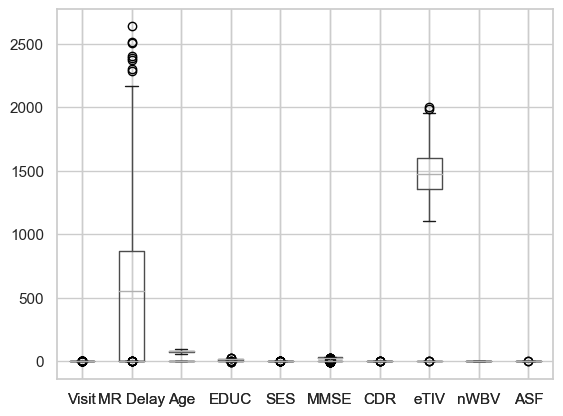

In [132]:
X_norm.boxplot()
plt.show()

Vidljive su stršeće vrijednosti na nekolicini atributa, kao Visit, MMSE, CDR. Za eliminaciju stršećih vrijednosti mogu se eliminirati zapisi sa stršećim vrijednostima, no radi toga da se ne izgubi značajan dio podataka, prag za outliere je povećan na 2 tako da se izbrišu samo oni zapisi s najviše stršećim vrijednostima:

In [133]:
Q1 = X_norm.quantile(0.25)
Q3 = X_norm.quantile(0.75)
IQR = Q3 - Q1

threshold = 2

outliers = ((X_norm < (Q1 - threshold * IQR)) | (X_norm > (Q3 + threshold * IQR)))

X_norm = X_norm[~outliers.any(axis=1)]

C:\Users\danij\AppData\Local\Temp\ipykernel_9692\3807742626.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = X_norm.quantile(0.25)
C:\Users\danij\AppData\Local\Temp\ipykernel_9692\3807742626.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = X_norm.quantile(0.75)
C:\Users\danij\AppData\Local\Temp\ipykernel_9692\3807742626.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((X_norm < (Q1 - threshold * IQR)) | (X_norm > (Q3 + threshold * IQR)))


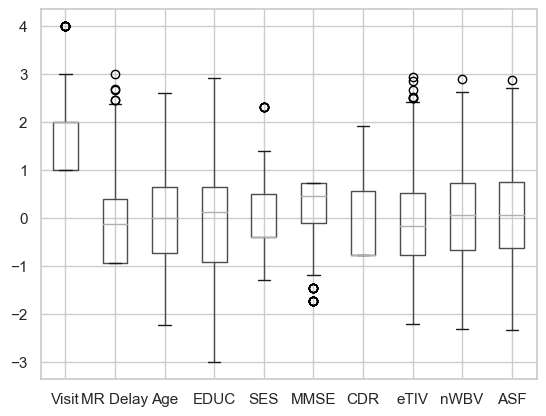

In [134]:
X_norm.boxplot()
plt.show()

In [135]:
X_norm.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,1.814159,-0.038217,0.014113,0.024203,-0.010469,0.203663,-0.137513,-0.039077,0.064491,0.042097
std,0.844915,0.966967,1.003789,1.011404,0.988265,0.627413,0.836442,1.008829,0.990705,1.010209
min,1.000000,-0.934093,-2.224534,-2.996621,-1.296323,-1.724264,-0.772897,-2.196659,-2.300375,-2.330606
25%,1.000000,-0.934093,-0.721370,-0.908834,-0.395694,-0.093065,-0.772897,-0.777525,-0.659663,-0.618091
50%,2.000000,-0.119344,-0.002466,0.135059,-0.395694,0.450668,-0.772897,-0.170960,0.066554,0.060314
75%,2.000000,0.406784,0.651083,0.657006,0.504935,0.722535,0.573322,0.524301,0.738977,0.753387
max,4.000000,3.010680,2.611731,2.918775,2.306192,0.722535,1.919541,2.941979,2.890730,2.883946


In [136]:
#naknadno dodano za spremanje dataseta
# X_norm = X_norm[X_norm['Visit'] == 1]
X_norm.to_csv('oasis_longitudinal_norm.csv', index=False)

Ostalo je 340 zapisa, što je relativno zadovoljavajuće.

**Vizualizacija podataka:**

Veza između CDR i spola:

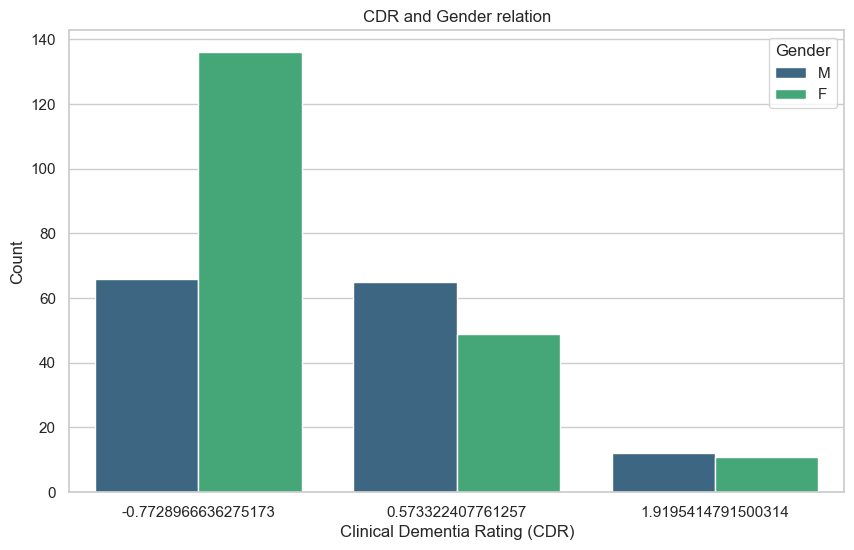

In [137]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='CDR', hue='M/F', data=X_norm, palette='viridis')

plt.xlabel('Clinical Dementia Rating (CDR)')
plt.ylabel('Count')
plt.title('CDR and Gender relation')

plt.legend(title='Gender', loc='upper right')

plt.show()

Korelacijska heatmap matrica za značajke mozga:

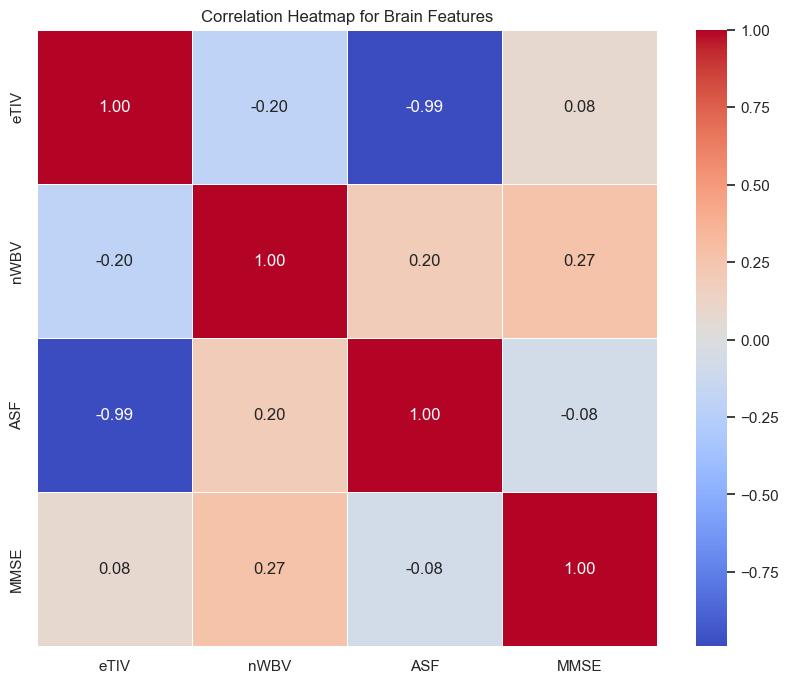

In [138]:
brain_features = ['eTIV', 'nWBV', 'ASF', 'MMSE']

correlation_matrix = X_norm[brain_features].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap for Brain Features')

plt.show()

Informativni histogrami za dob, MMSE i nWBV:

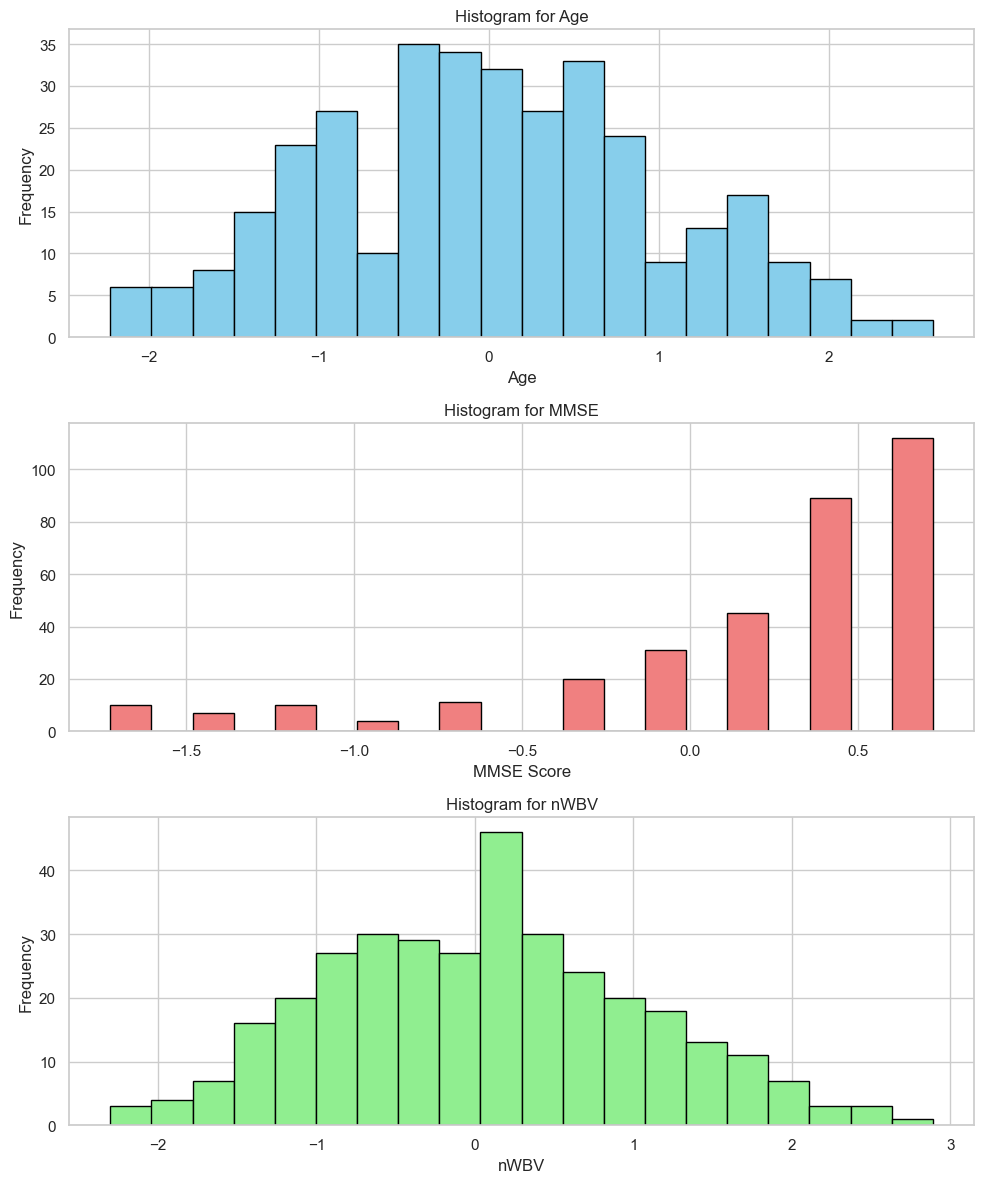

In [139]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

axes[0].hist(X_norm['Age'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram for Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

axes[1].hist(X_norm['MMSE'], bins=20, color='lightcoral', edgecolor='black')
axes[1].set_title('Histogram for MMSE')
axes[1].set_xlabel('MMSE Score')
axes[1].set_ylabel('Frequency')

axes[2].hist(X_norm['nWBV'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Histogram for nWBV')
axes[2].set_xlabel('nWBV')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Violinski graf za SES i CDR:

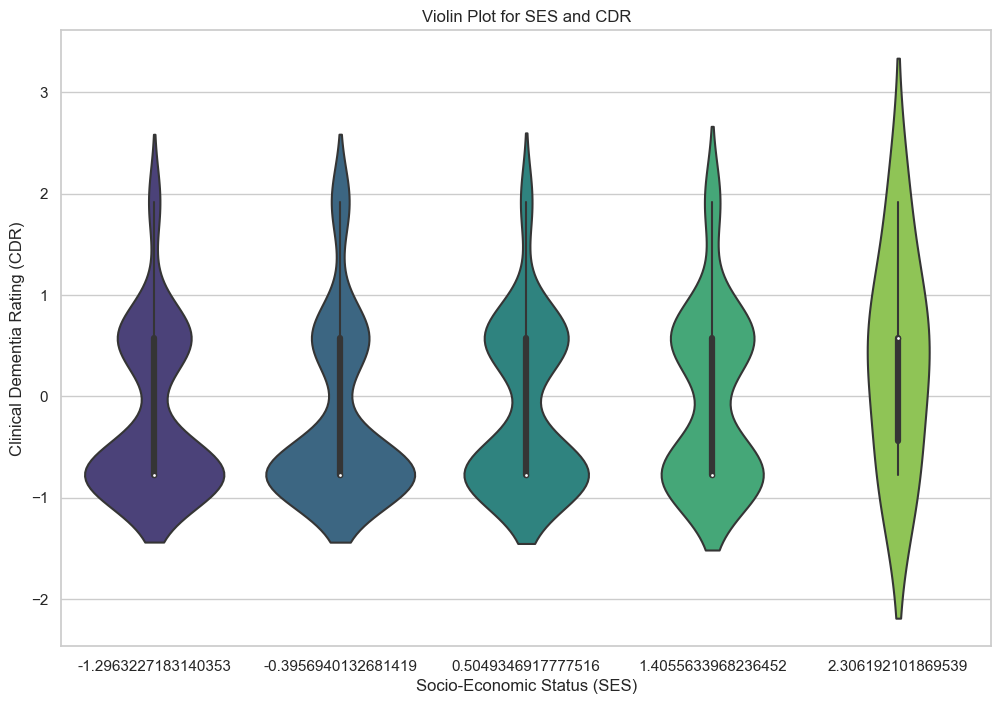

In [140]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.violinplot(x='SES', y='CDR', data=X_norm, palette='viridis')

plt.xlabel('Socio-Economic Status (SES)')
plt.ylabel('Clinical Dementia Rating (CDR)')
plt.title('Violin Plot for SES and CDR')

plt.show()

<h2> Druga kontrolna točka </h2>

In [141]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import FuncFormatter

Učitavanje normiranih podataka:

In [142]:
X = pd.read_csv("oasis_longitudinal_norm.csv")

In [143]:
X.shape

(339, 15)

Selektiranje samo prvih posjeta:

In [144]:
# X.drop(X[X['Visit'] != 1].index, inplace=True)
X = X[X['Visit'] == 1]
X.shape

(144, 15)

Enkodiranje kategoričkih varijabli:

In [145]:
le = LabelEncoder()
X['M/F'] = le.fit_transform(X['M/F'])
X['Hand'] = le.fit_transform(X['Hand'])

features = X[['Visit','MR Delay','M/F','Hand','Age','EDUC','SES','MMSE','eTIV','nWBV','ASF']]
# target = X['Group']

Preslikavanje CDR-a u labele razreda (Nondemented - 0, Demented - 1):

In [146]:
def determine_class(cdr_value): 
    return 1 if cdr_value > 0 else 0
    
target = X['CDR'].apply(determine_class)

In [147]:
X.drop(['Group', 'CDR'], axis=1, inplace=True)

Raspoređivanje primjera u skupove za treniranje i ispitivanje (80%/20%):

In [148]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Definicija modela različitih klasifikatora:

In [149]:
decision_tree_clf = DecisionTreeClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)
xgboost_clf = XGBClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree_clf), ('rf', random_forest_clf), ('svm', svm_clf), ('xgb', xgboost_clf)],
    voting='soft'
)

Treniranje klasifikatora:

In [150]:
decision_tree_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
xgboost_clf.fit(X_train, y_train)
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svm', SVC(probability=True, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_cat...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

Pokazno, kros-validacija modela:

In [151]:
classifiers = [decision_tree_clf, random_forest_clf, svm_clf, xgboost_clf, voting_clf]
for clf in classifiers:
    cv_scores = cross_val_score(clf, features, target, cv=5, scoring='accuracy')
    print(f'{clf.__class__.__name__} 5-Fold Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}')

DecisionTreeClassifier 5-Fold Cross-Validation Mean Accuracy: 0.7574
RandomForestClassifier 5-Fold Cross-Validation Mean Accuracy: 0.8335
SVC 5-Fold Cross-Validation Mean Accuracy: 0.7564
XGBClassifier 5-Fold Cross-Validation Mean Accuracy: 0.8057
VotingClassifier 5-Fold Cross-Validation Mean Accuracy: 0.8059


Dobivanje predikcijâ modela:

In [152]:
dt_pred = decision_tree_clf.predict(X_test)
rf_pred = random_forest_clf.predict(X_test)
svm_pred = svm_clf.predict(X_test)
xgboost_pred = xgboost_clf.predict(X_test)
voting_pred = voting_clf.predict(X_test)

Priprema za evaluaciju modela:

In [153]:
classifiers = [
    ('Decision Tree', decision_tree_clf, dt_pred),
    ('Random Forest', random_forest_clf, rf_pred),
    ('SVM', svm_clf, svm_pred),
    ('XGBoost', xgboost_clf, xgboost_pred),
    ('Voting', voting_clf, voting_pred)
]

Evaluacija modela i nalaženje metrika - accuracy, precision, recall, F1 score:

In [154]:
from sklearn.metrics import f1_score

for clf_name, clf, predictions in classifiers:
    accuracy = accuracy_score(y_test, predictions,) * 100
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    # conf_matrix = confusion_matrix(y_test, predictions)

    print(f'\nMetrics for {clf_name} Classifier:')
    print(f'Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}')
    print(f'F1 score: {recall:.5f}')

    # print(f'Confusion Matrix:\n{conf_matrix}')


Metrics for Decision Tree Classifier:
Accuracy: 82.76%
Precision: 0.83215
Recall: 0.82759
F1 score: 0.82759

Metrics for Random Forest Classifier:
Accuracy: 86.21%
Precision: 0.88715
Recall: 0.86207
F1 score: 0.86207

Metrics for SVM Classifier:
Accuracy: 75.86%
Precision: 0.77486
Recall: 0.75862
F1 score: 0.75862

Metrics for XGBoost Classifier:
Accuracy: 82.76%
Precision: 0.83436
Recall: 0.82759
F1 score: 0.82759

Metrics for Voting Classifier:
Accuracy: 82.76%
Precision: 0.82613
Recall: 0.82759
F1 score: 0.82759


<b>Točnost (accuracy)</b> ovih klasifikatora je bolja (od onih u članku) samo za <b>decision tree</b>, a za ostale klasifikatore je malo lošija. </br>
<b>Preciznost (precision)</b> ovih klasifikatora je bolja za <b>decision tree</b> i <b>random forest</b>, a za ostale klasifikatore je malo lošija. </br>
<b>Odziv (recall)</b> ovih klasifikatora je bolji za <b>decision tree</b>, <b>random forest</b> i <b>SVM</b>, a za ostale klasifikatore je sličan (onima u članku). </br>
<b>F1 metrika (F1-score)</b> ovih klasifikatora je bolja za <b>decision tree</b> i <b>random forest</b>, a za ostale klasifikatore je malo lošija.

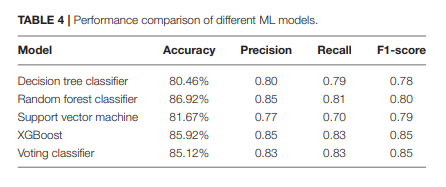

Vizualni prikaz metrika:

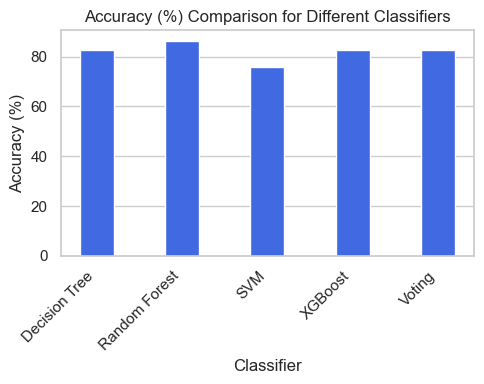

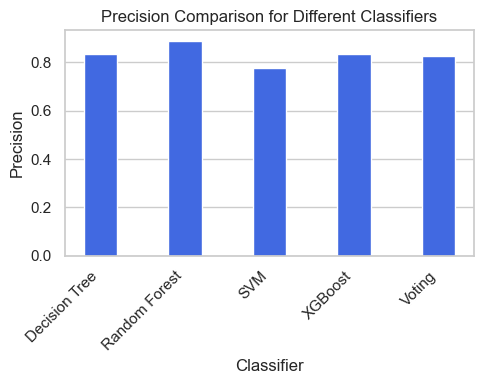

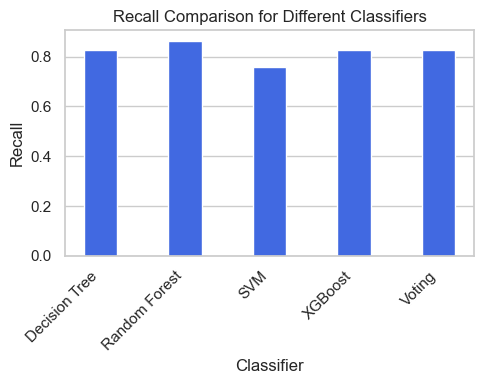

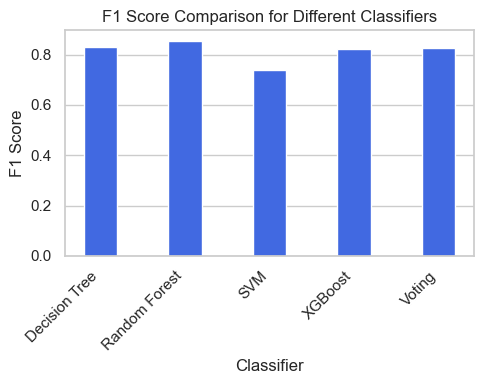

In [155]:
def percentage_formatter(x, pos):
    return f'{x:.0f}%'

metrics_names = ['Accuracy (%)', 'Precision', 'Recall', 'F1 Score']

for metric_name in metrics_names:
    plt.figure(figsize=(5, 4))
    plt.title(f'{metric_name} Comparison for Different Classifiers')
    plt.xlabel('Classifier')
    plt.ylabel(metric_name)

    metric_values = []

    for clf_name, clf, predictions in classifiers:
        if metric_name == 'Accuracy (%)':
            metric_value = accuracy_score(y_test, predictions) * 100
        elif metric_name == 'Precision':
            metric_value = precision_score(y_test, predictions, average='weighted')
        elif metric_name == 'Recall':
            metric_value = recall_score(y_test, predictions, average='weighted')
        elif metric_name == 'F1 Score':
            metric_value = f1_score(y_test, predictions, average='weighted')

        metric_values.append(metric_value)
        plt.bar(clf_name, metric_value, width=0.4, color='royalblue', zorder=2)
    plt.grid(axis='y', zorder=1)  
    plt.grid(axis='x', linewidth=0)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Prikaz matrica zabune:

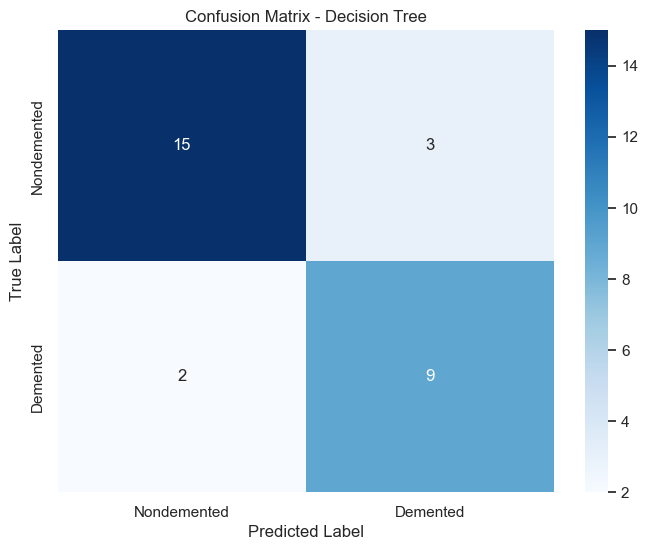

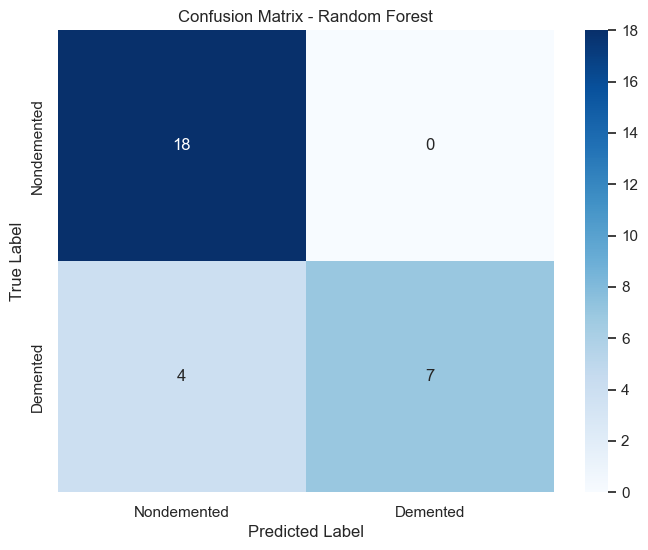

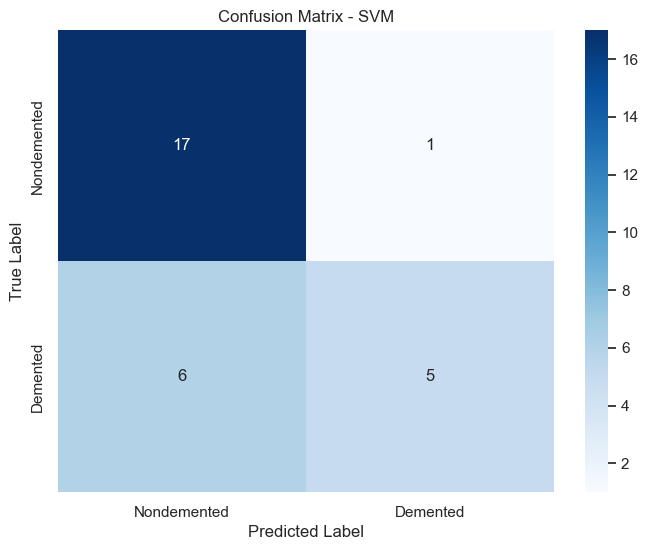

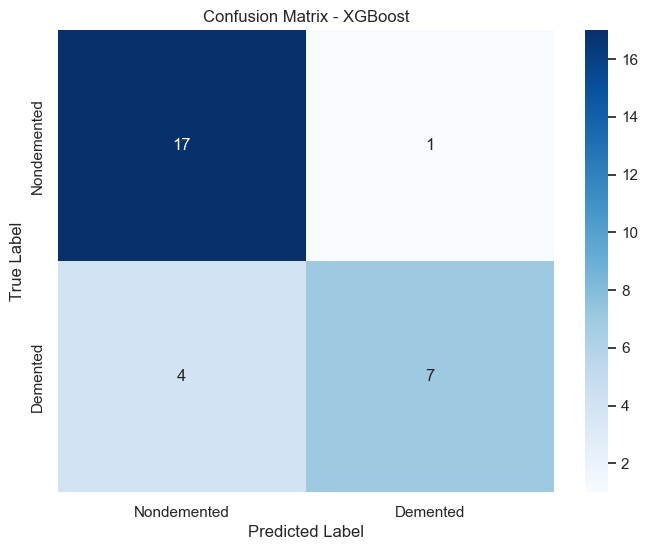

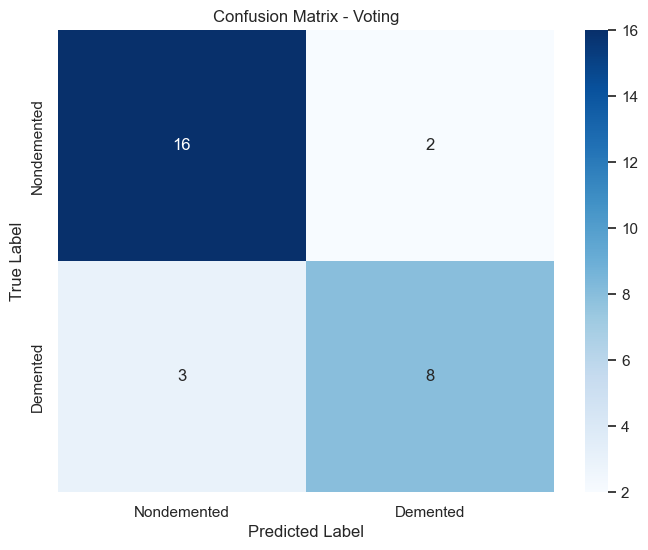

In [156]:
for clf_name, clf, pred in classifiers:
    cm = confusion_matrix(y_test, pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Nondemented", "Demented"], yticklabels=["Nondemented", "Demented"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.show()

Ovdje je manje klasificiranih primjeraka (29 primjeraka) u usporedbi s člankom (75-112 primjeraka; članak nije konzistentan, ali je na većini grafova 112 primjeraka). To je vjerojatno zato što su ovdje u obzir uzeti samo prvi posjeti pacijenata doktoru, dok su ostali posjeti odbačeni. SVM klasifikator je napravio najviše pogrešnih klasifikacija, dok ostali klasifikatori to rade manje.

Prikaz ROC krivulje i AUC score:

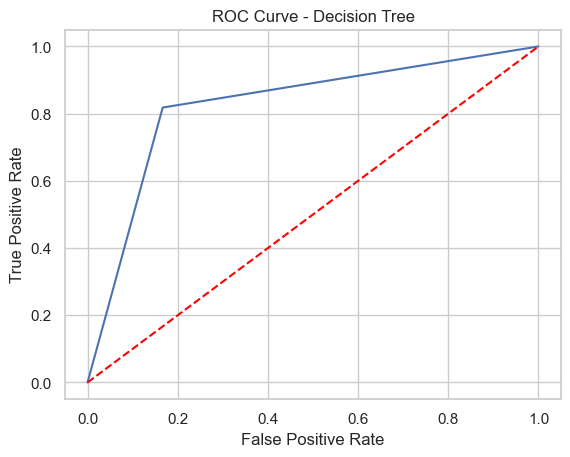

AUC: 0.82576



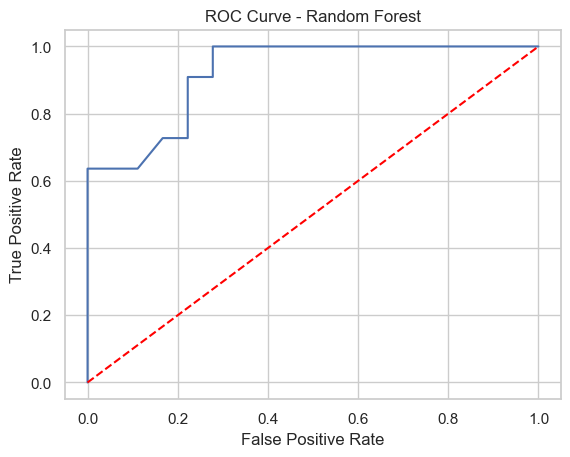

AUC: 0.92172



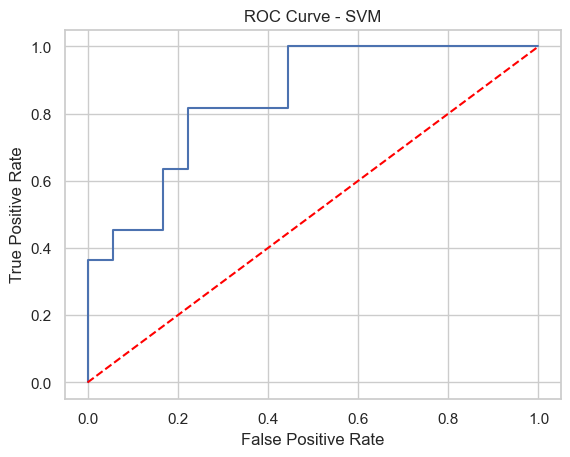

AUC: 0.84343



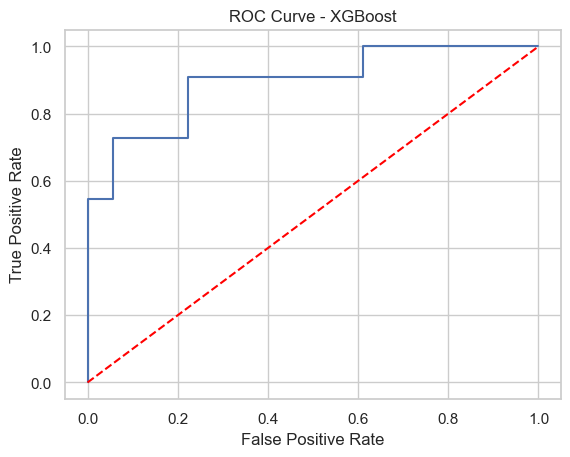

AUC: 0.89394



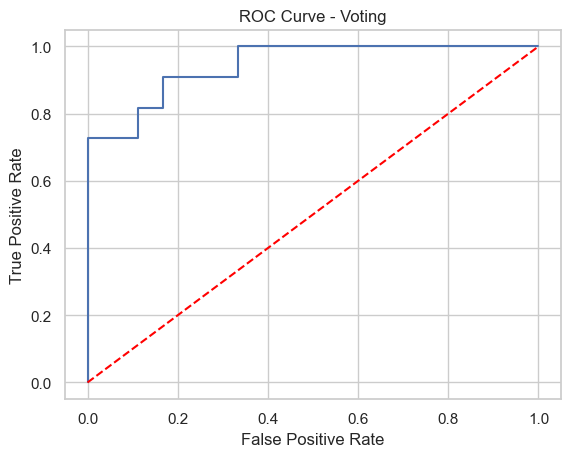

AUC: 0.94444



In [157]:
for clf_name, clf, predictions in classifiers:
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color="red", linestyle='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(f'ROC Curve - {clf_name}')
    plt.show()
    print("AUC: " + f"{auc:.5f}")
    print()

Dakle, najbolje performira Voting klasifikator (AUC = 0.94444), a najgore performira Decision tree klasifikator (AUC = 0.82576). Za referencu je nacrtana ravna linija za koju vrijedi AUC = 0.5 (što je AUC vrijednost karakteristična slučajnom klasifikatoru, dok sve AUC vrijednosti našeg modela, označene plavom linijom, nadilaze tu vrijednost, što znači da performiraju mnogo bolje od slučajnog klasifikatora).